# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

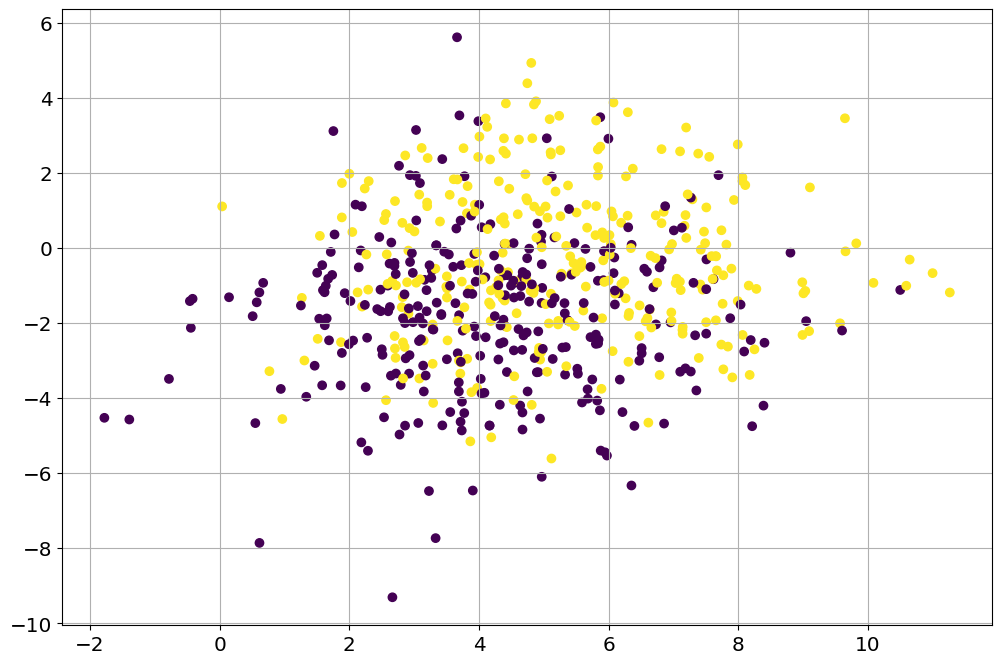

In [85]:
import numpy as np
from sklearn import datasets # see https://scikit-learn.org/stable/datasets/index.html
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [86]:
from sklearn.model_selection import train_test_split
# add your code below
# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (480, 2)
Testing data shape: (120, 2)
Training labels shape: (480,)
Testing labels shape: (120,)


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [87]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of the KNN classifier: {accuracy * 100:.2f}%")


Accuracy of the KNN classifier: 64.17%


# 1.3

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions). (You will need to install mlxtend.)

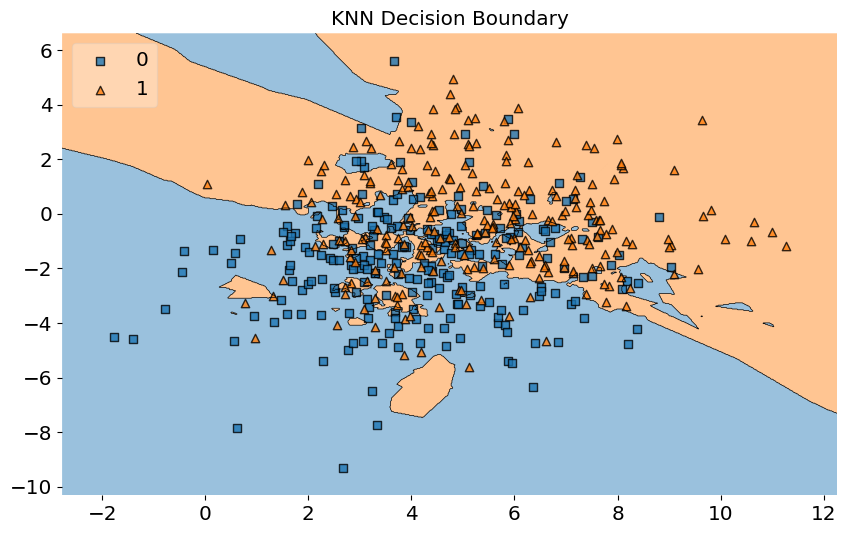

In [88]:
from mlxtend.plotting import plot_decision_regions
# add your code below
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=knn, legend=2)

# Add labels and title
plt.title('KNN Decision Boundary')

plt.show()


# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels.

In [89]:
# add your code below
y_pred = knn.predict(X_test)

print("Predicted Labels: ", y_pred)
print("True Labels:      ", y_test)

Predicted Labels:  [0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1]
True Labels:       [0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 1]


# 1.5

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

Confusion Matrix:
[[42 26]
 [17 35]]


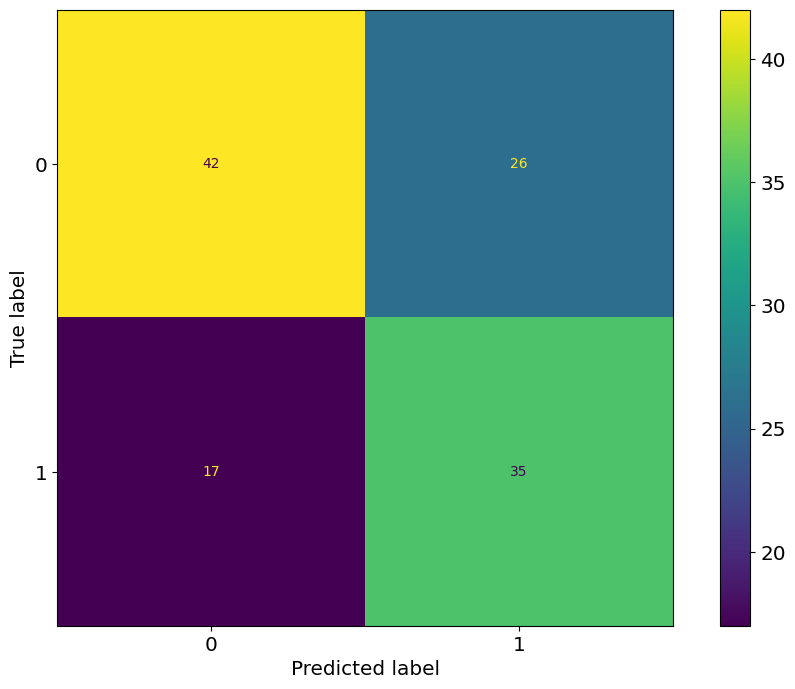

In [90]:
# add your code below
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix =confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [91]:
from sklearn.metrics import classification_report
# add your code below
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        68
           1       0.57      0.67      0.62        52

    accuracy                           0.64       120
   macro avg       0.64      0.65      0.64       120
weighted avg       0.65      0.64      0.64       120



# 1.7

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [92]:
# add your code below
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)




```
# This is formatted as code
```

# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

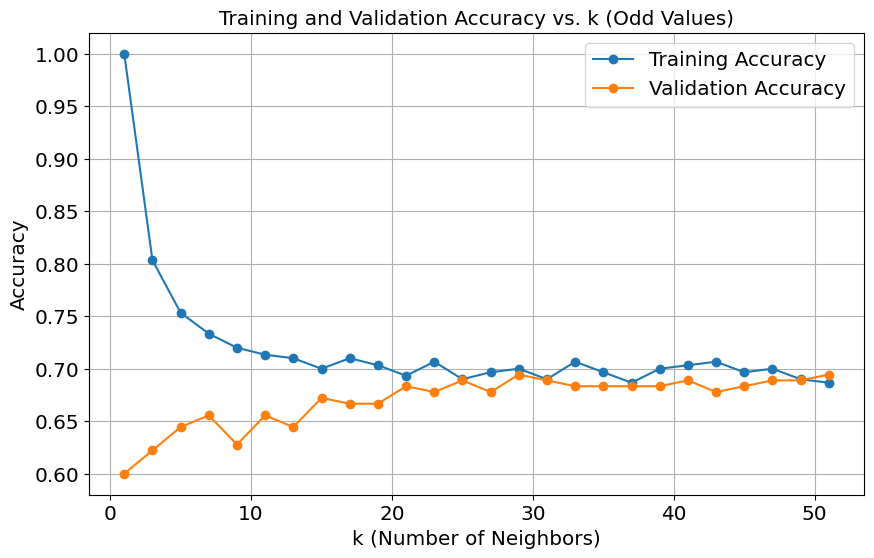

In [93]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
val_accuracies = []

k_values = list(range(1, 52, 2))

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy = knn.score(X_train, y_train)
  val_accuracy = knn.score(X_val, y_val)
  train_accuracies.append(train_accuracy)
  val_accuracies.append(val_accuracy)

plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o' )
plt.plot(k_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. k (Odd Values)')
plt.legend()
plt.grid(True)
plt.show()


## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data:
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

![image.png](attachment:image.png)

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [94]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

best_k_index = val_accuracies.index(max(val_accuracies))
best_k = k_values[best_k_index]
print(f"The best K is: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_test_pred = knn_best.predict(X_test)

print("Classification Report for the Test Set:")
print(classification_report(y_test, y_test_pred))

The best K is: 29
Classification Report for the Test Set:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        55
           1       0.72      0.66      0.69        65

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.67       120
weighted avg       0.68      0.68      0.68       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

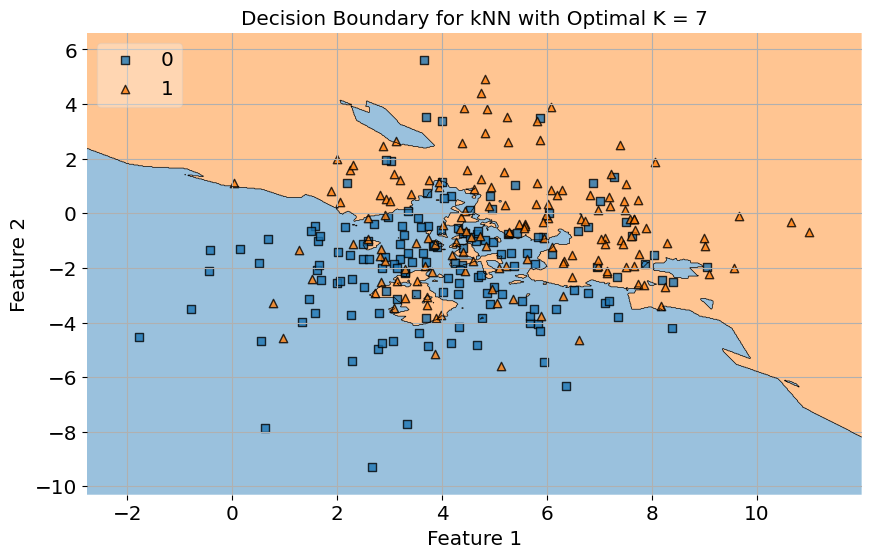

In [96]:
# add your code below
best_k = 7
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=knn_best, legend=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision Boundary for kNN with Optimal K = {best_k}')
plt.grid(True)
plt.show()

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

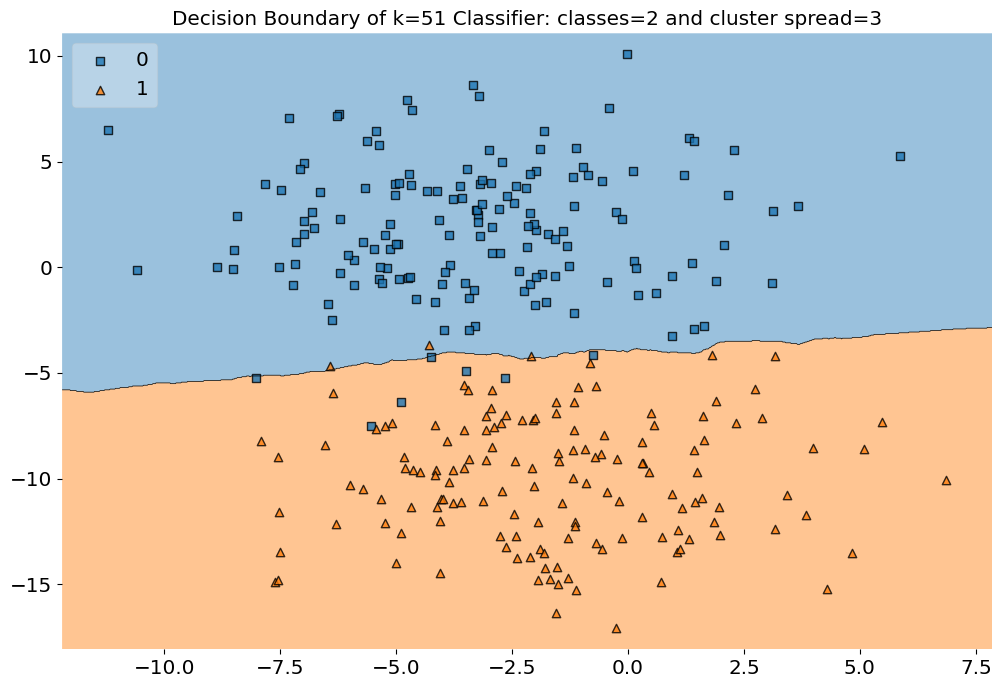

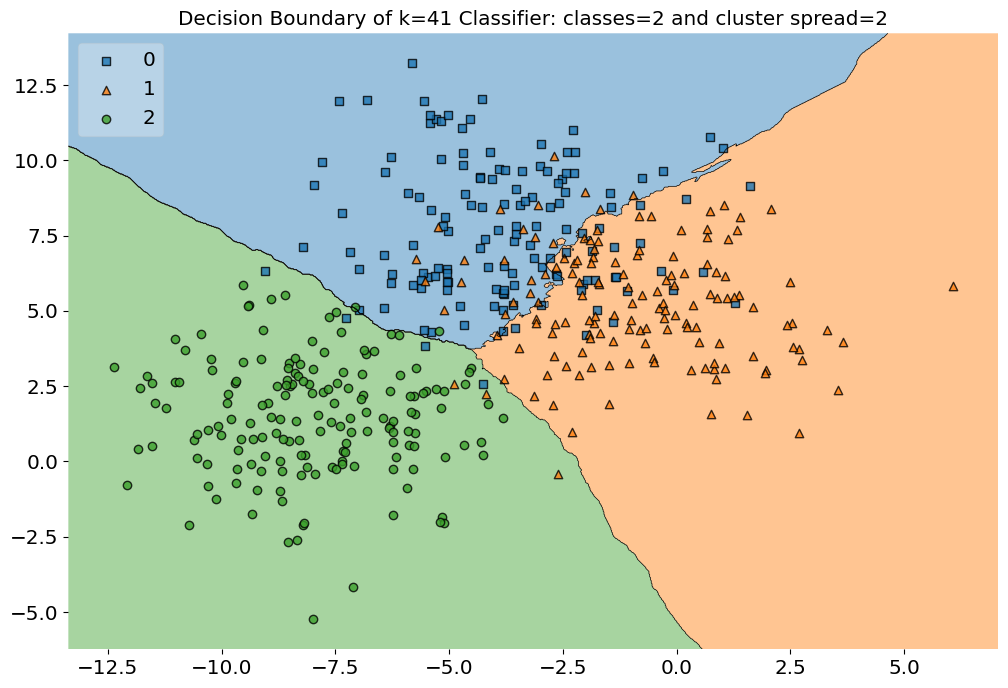

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


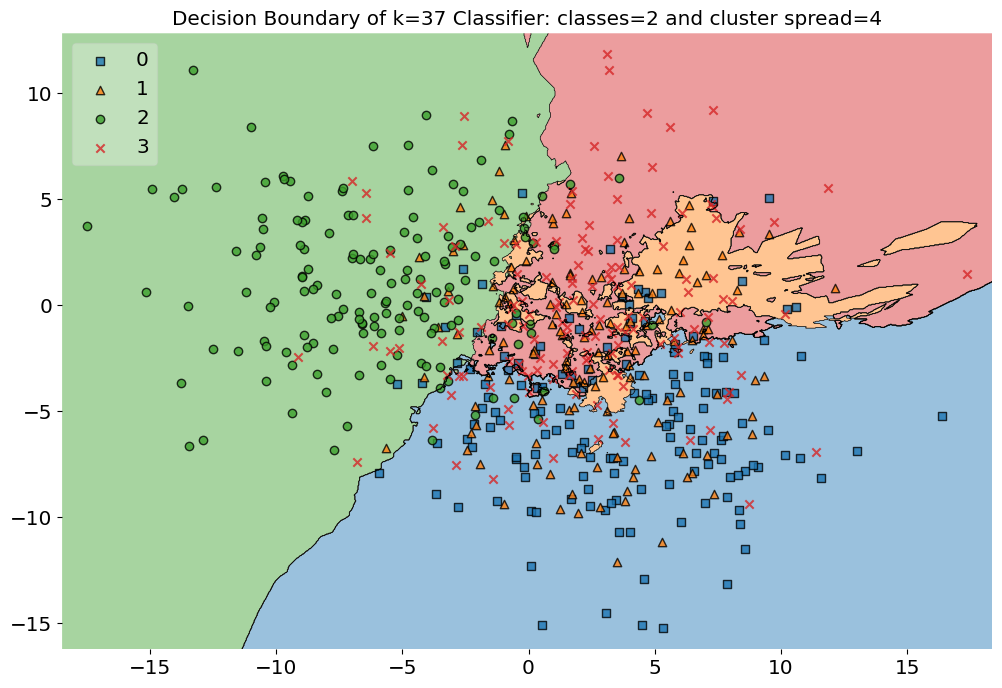

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


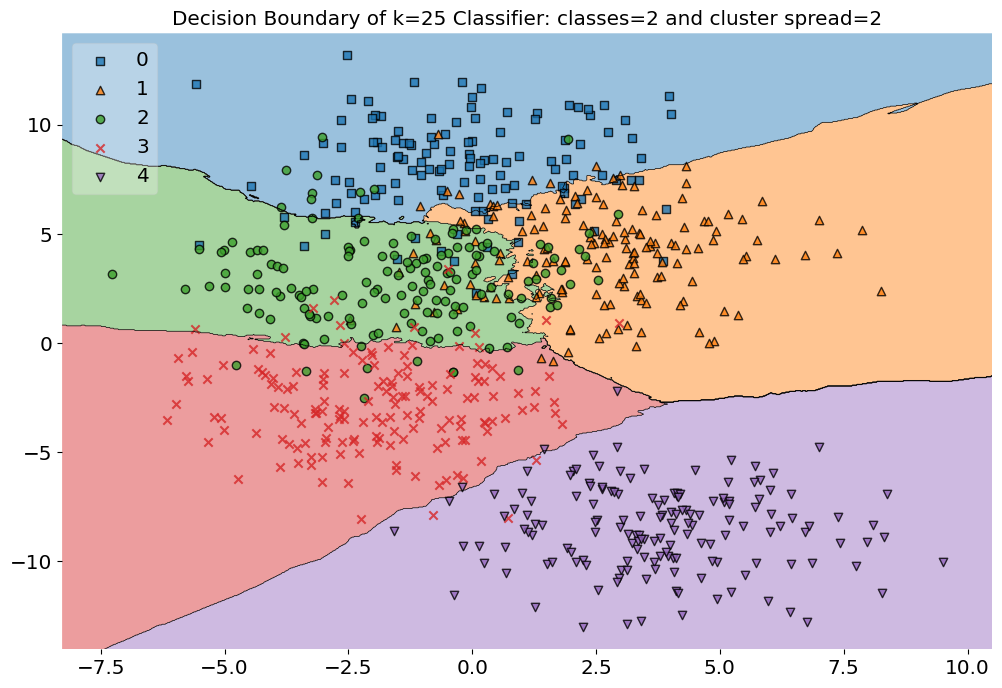

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


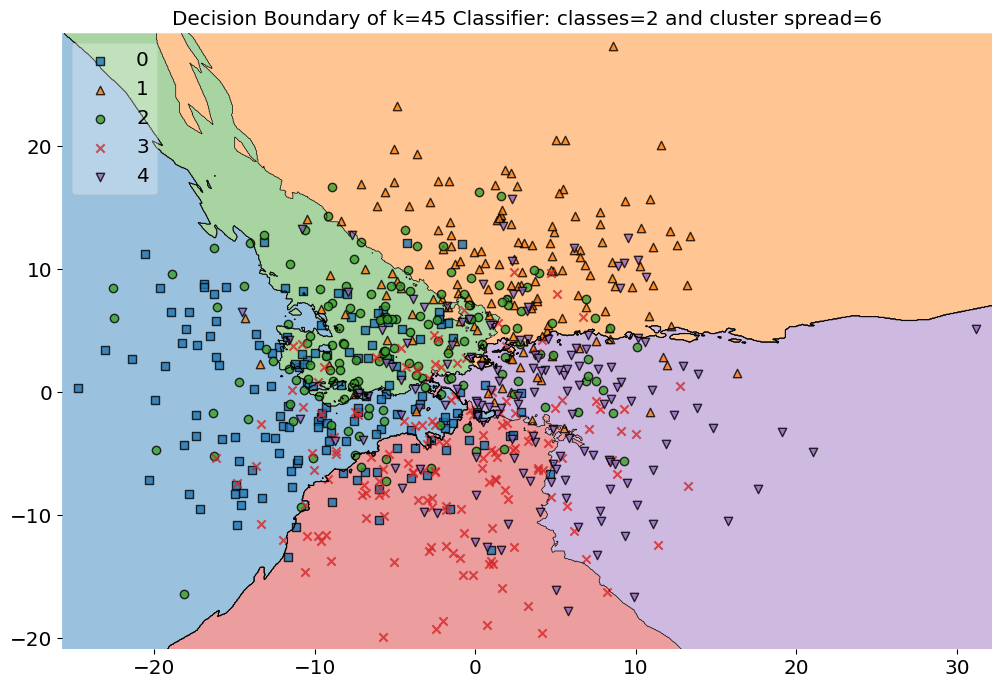

In [95]:
# add your code below
def generate_and_plot_knn(number_classes, cluster_std):
    num_Observations = number_classes*300

    X, y = datasets.make_blobs(num_Observations, centers=number_classes, cluster_std=cluster_std)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.40, random_state=42)

    train_accuracies = []
    val_accuracies = []
    k_values = list(range(1, 52, 2))

    for k in k_values:
        k_classifier = KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(X_train, y_train)

        train_accuracies.append(k_classifier.score(X_train, y_train))
        val_accuracies.append(k_classifier.score(X_val, y_val))

    max_value = np.max(val_accuracies)
    kmax_values_array = []
    j = 0
    for i in k_values:
        if val_accuracies[j] == max_value:
            kmax_values_array.append(i)
        j+=1

    best_k_value = kmax_values_array[-1]
    best_k_classifier = KNeighborsClassifier(n_neighbors=best_k_value)
    best_k_classifier.fit(X_train, y_train)

    plt.figure()
    plot_decision_regions(X_train, y_train, clf=best_k_classifier, legend=2)
    plt.title('Decision Boundary of k={} Classifier: classes={} and cluster spread={}'.format(best_k_value, numClasses, cluster_std))
    plt.show()

generate_and_plot_knn(number_classes = 2, cluster_std = 3)
generate_and_plot_knn(number_classes = 3, cluster_std = 2)
generate_and_plot_knn(number_classes = 4, cluster_std = 4)
generate_and_plot_knn(number_classes = 5, cluster_std = 2)
generate_and_plot_knn(number_classes = 5, cluster_std = 6)


The cluster spread significantly impacts decision boundaries: larger spreads result in less distinct and more overlapping boundaries. As the number of classes increases, the decision boundaries become more complex, raising the risk of misclassification due to considering neighbors from more diverse classes.

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst some of the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them.

Below are two functions we will use to extract features from the audio data.

In [97]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

![Screen%20Shot%202020-08-31%20at%2018.20.16.png](attachment:Screen%20Shot%202020-08-31%20at%2018.20.16.png)

Downloading...
From (original): https://drive.google.com/uc?id=14UJQ34_TY7piGuecB4NWveGmqTajlTGQ
From (redirected): https://drive.google.com/uc?id=14UJQ34_TY7piGuecB4NWveGmqTajlTGQ&confirm=t&uuid=5269e970-4939-44e6-bd74-a17fa18957eb
To: /content/Data-1.zip
100%|██████████| 158M/158M [00:01<00:00, 107MB/s]


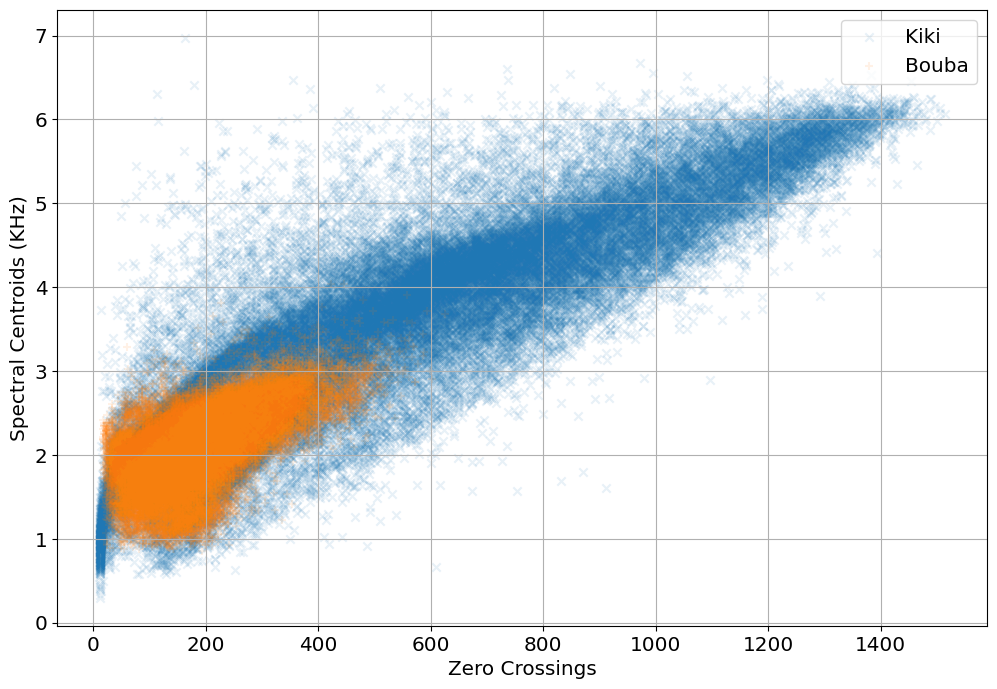

In [98]:
# add your code below
import gdown
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

url = 'https://drive.google.com/uc?id=14UJQ34_TY7piGuecB4NWveGmqTajlTGQ'
output = 'Data-1.zip'
gdown.download(url, output, quiet=False)

zip_ref = zipfile.ZipFile(output, 'r')  # 'Data-1.zip'
zip_ref.extractall("/content/musicinformatics")
zip_ref.close()

base_directory = "/content/musicinformatics/kikibouba_train"
train_bouba_path = os.path.join(base_directory, "bouba")
train_kiki_path = os.path.join(base_directory, "kiki")

window_size_in_ms = 100
sample_rate = 22050
window_size_in_samples = int(sample_rate * window_size_in_ms / 1000)
window_hop_in_samples = window_size_in_samples

bouba_zc = []
bouba_sc = []
bouba_train = []

for file in os.listdir(train_bouba_path):
    if file.endswith('.mp3'):
        bouba_train.append(file)

for file in bouba_train:
    data, sr = librosa.load(os.path.join(train_bouba_path, file), sr=sample_rate)
    zc = extractZC(data, window_size_in_samples, window_hop_in_samples)
    sc = extractSC(data, window_size_in_samples, window_hop_in_samples, sr)

    bouba_zc.append(zc)
    bouba_sc.append(sc)

bouba_zc = np.concatenate(bouba_zc)
bouba_sc = np.concatenate(bouba_sc) / 1000

kiki_zc = []
kiki_sc = []
kiki_train = []

for file in os.listdir(train_kiki_path):
    if file.endswith('.mp3'):
        kiki_train.append(file)

for file in kiki_train:
    data, sr = librosa.load(os.path.join(train_kiki_path, file), sr=sample_rate)
    zc = extractZC(data, window_size_in_samples, window_hop_in_samples)
    sc = extractSC(data, window_size_in_samples, window_hop_in_samples, sr)

    kiki_zc.append(zc)
    kiki_sc.append(sc)

kiki_zc = np.concatenate(kiki_zc)
kiki_sc = np.concatenate(kiki_sc) / 1000

plt.figure()
plt.ylabel('Spectral Centroids (KHz)')
plt.xlabel('Zero Crossings')
plt.scatter(kiki_zc, kiki_sc, marker='x', alpha=0.1, label='Kiki')
plt.scatter(bouba_zc, bouba_sc, marker='+', alpha=0.1, label='Bouba')
plt.legend(loc='upper right')
plt.grid()
plt.show()




# 2.2

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

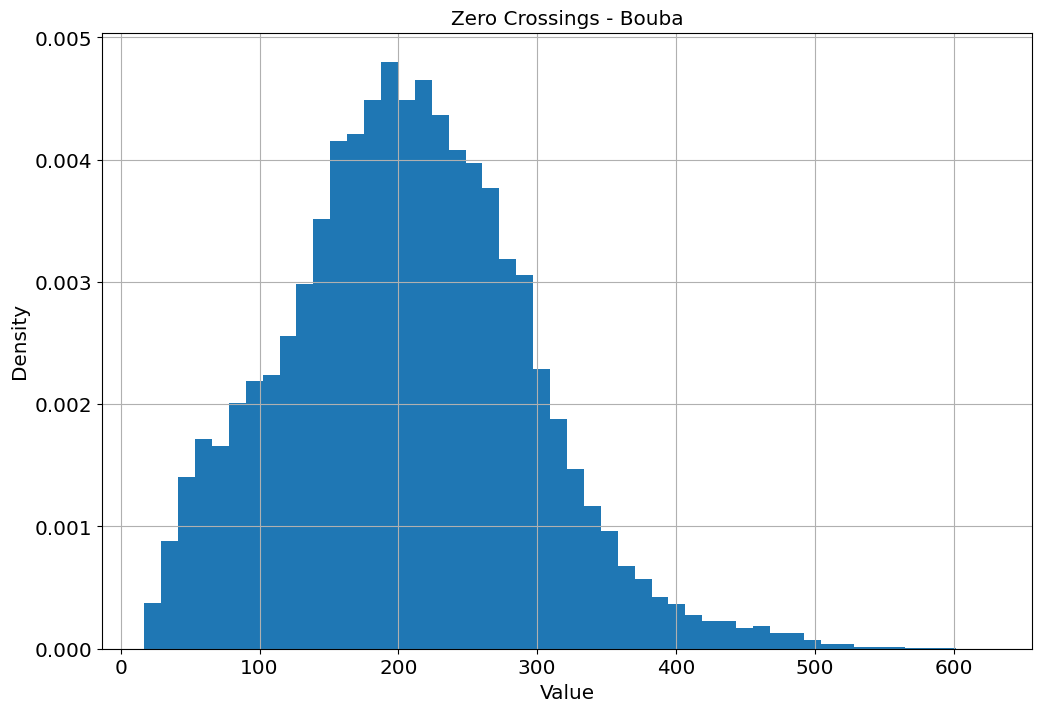

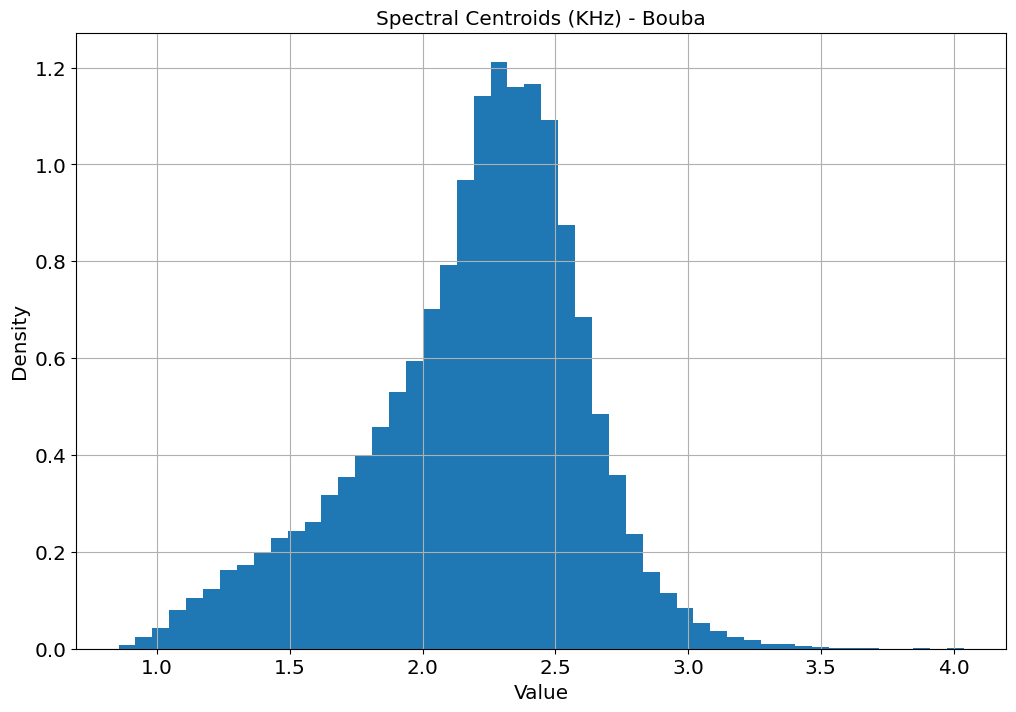

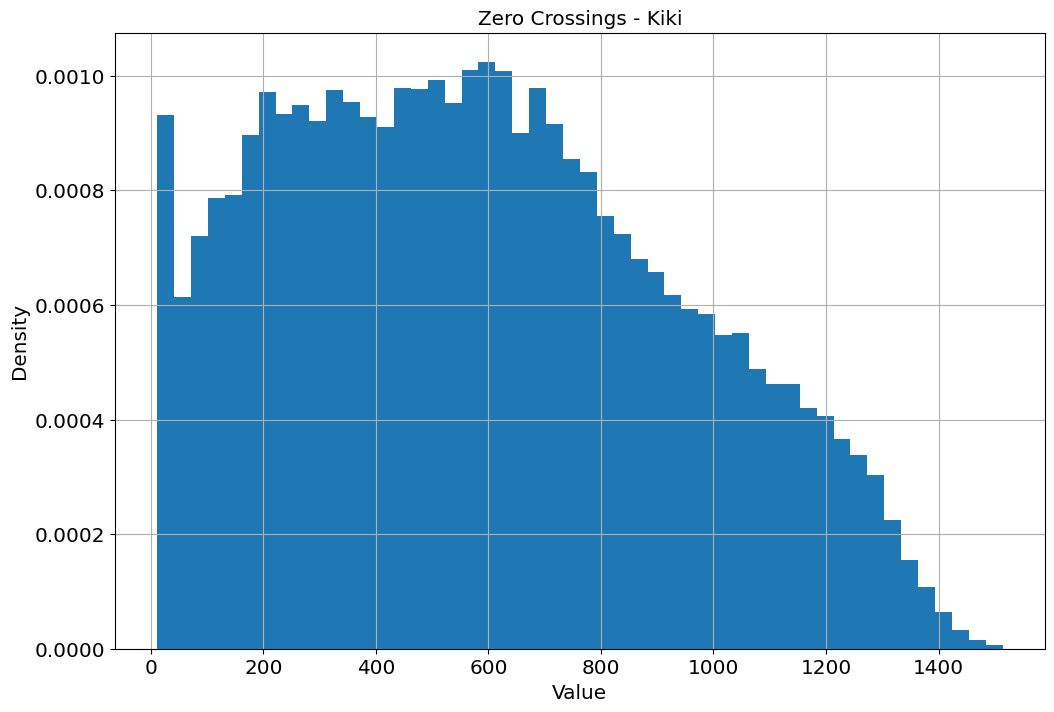

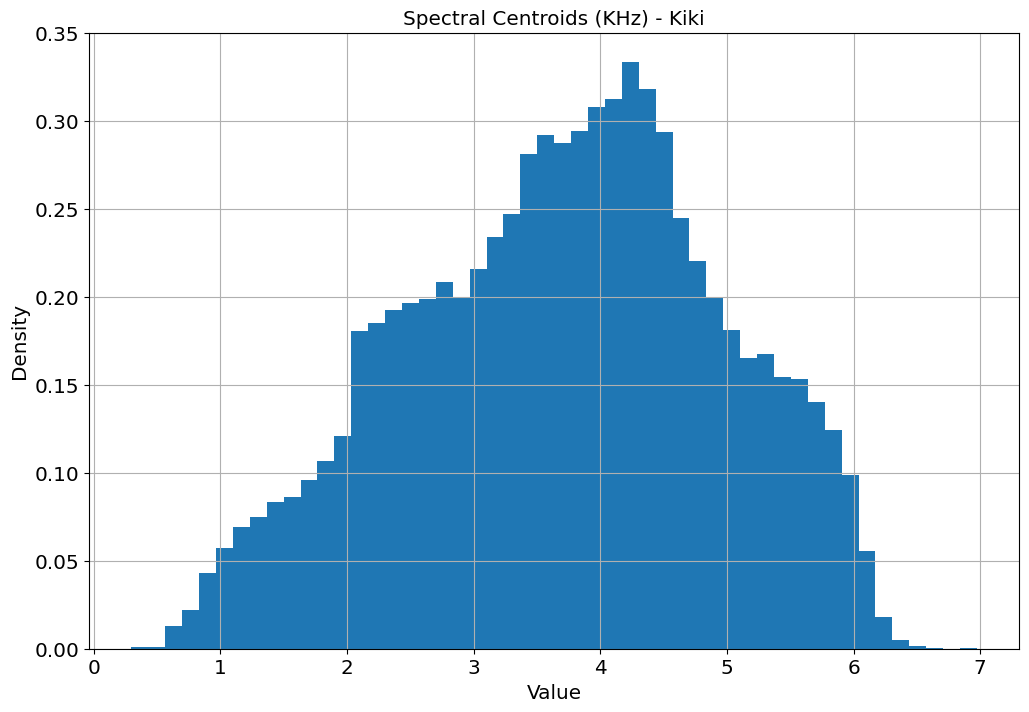

In [79]:
# add your code below
import pandas as pd

def plot_histogram(array, title_name):
    df = pd.DataFrame(array)
    df.hist(density=True, bins=50)
    plt.title(title_name)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

plot_histogram(bouba_zc, 'Zero Crossings - Bouba')

plot_histogram(bouba_sc, 'Spectral Centroids (KHz) - Bouba')

plot_histogram(kiki_zc, 'Zero Crossings - Kiki')

plot_histogram(kiki_sc, 'Spectral Centroids (KHz) - Kiki')



# 2.3

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
![Screen%20Shot%202020-09-01%20at%2012.19.19.png](attachment:Screen%20Shot%202020-09-01%20at%2012.19.19.png)

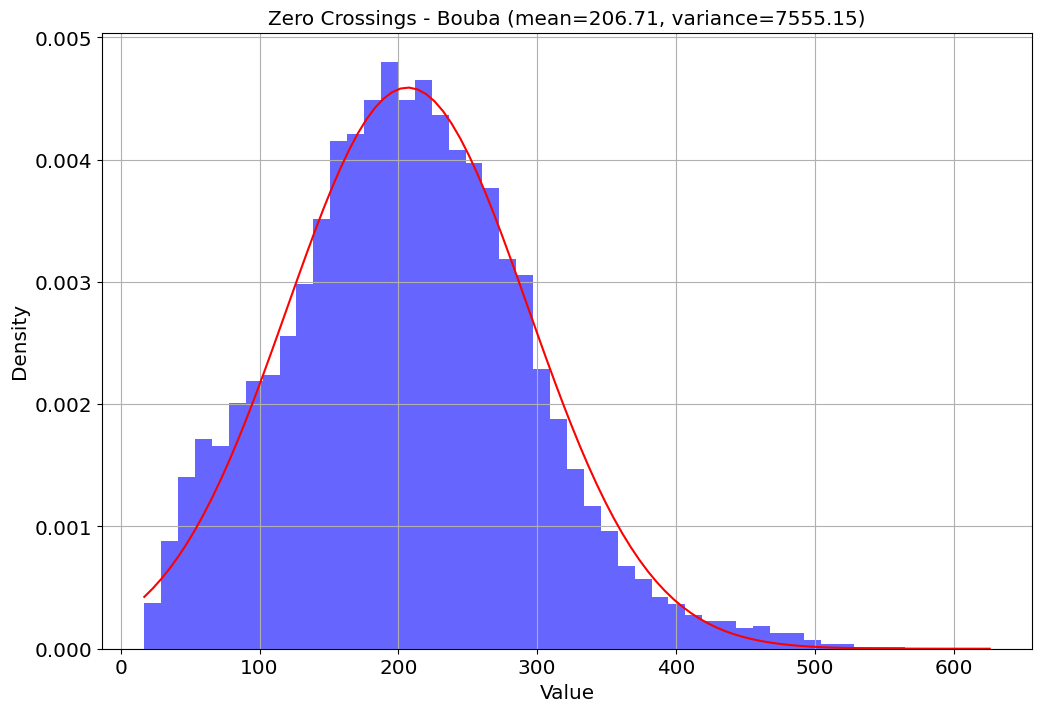

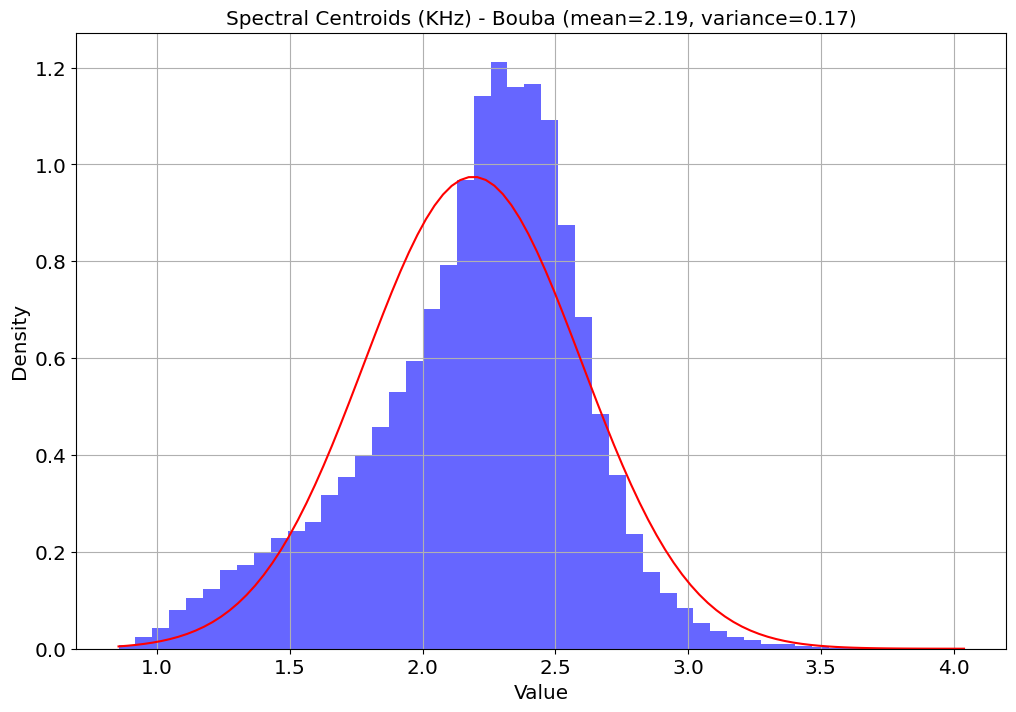

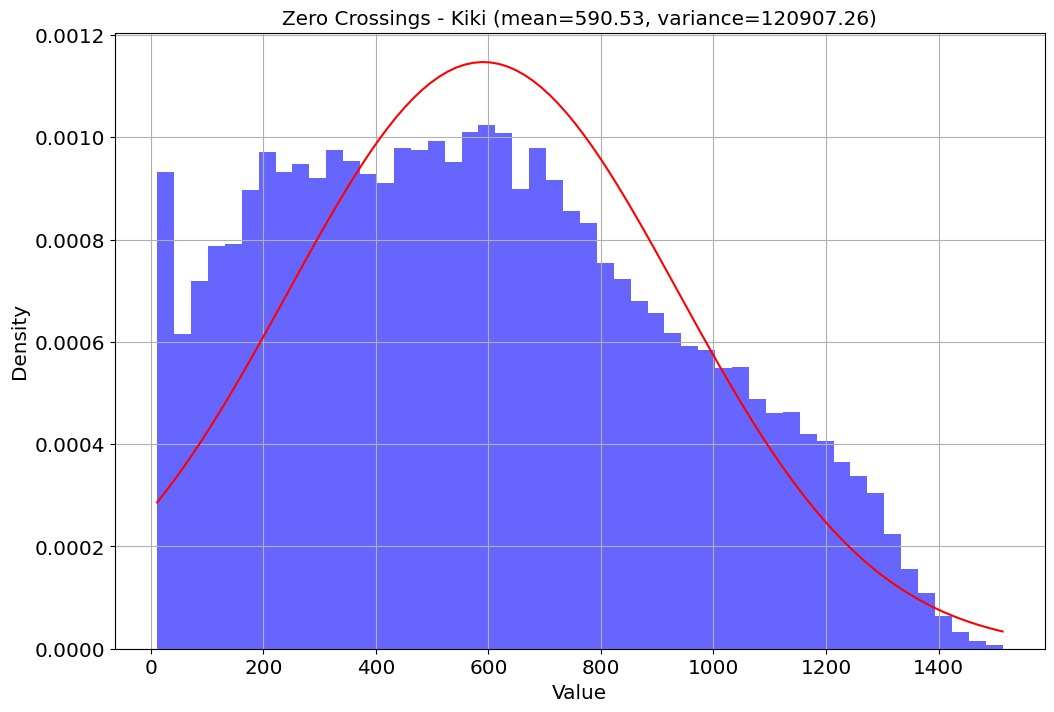

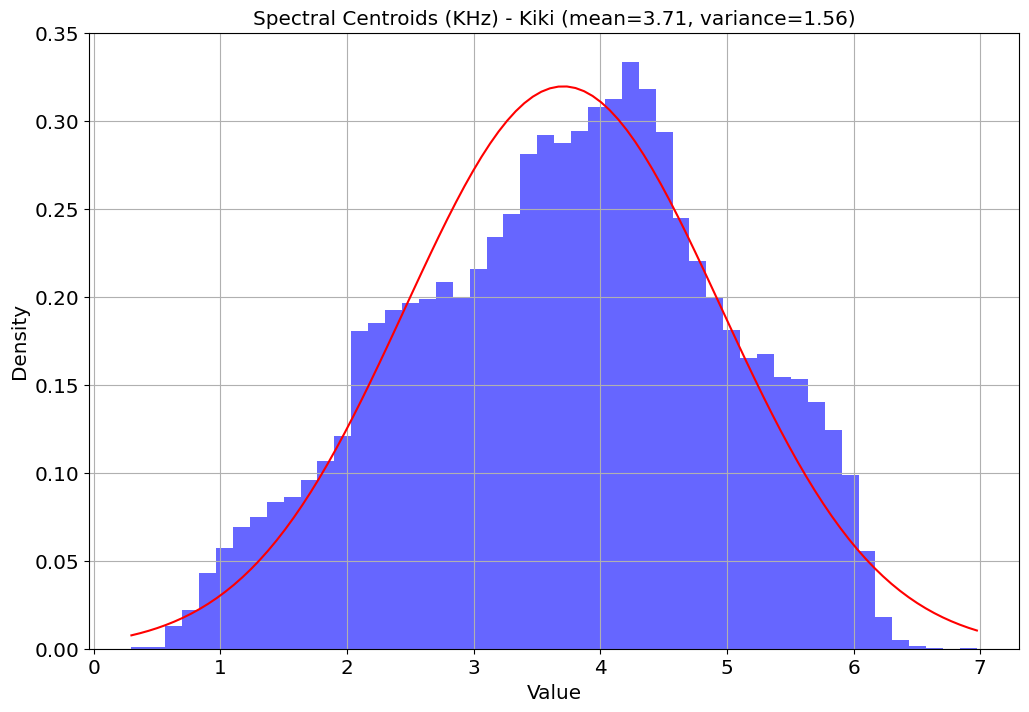

In [80]:
from scipy.stats import norm

# add your code below
def mle_parameters(array):
    mean = np.mean(array)
    variance = np.var(array, ddof=1)
    return mean, variance


def plot_histogram_with_gaussian(array, title_name, color='blue'):
    plt.hist(array, bins=50, density=True, alpha=0.6, color=color)

    mean, variance = mle_parameters(array)
    sigma = np.sqrt(variance)
    x = np.linspace(min(array), max(array), 100)
    gaussian_curve = norm.pdf(x, mean, sigma)
    plt.plot(x, gaussian_curve, color='red')

    plt.title(f'{title_name} (mean={mean:.2f}, variance={variance:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

plot_histogram_with_gaussian(bouba_zc, 'Zero Crossings - Bouba')
plot_histogram_with_gaussian(bouba_sc, 'Spectral Centroids (KHz) - Bouba')
plot_histogram_with_gaussian(kiki_zc, 'Zero Crossings - Kiki')
plot_histogram_with_gaussian(kiki_sc, 'Spectral Centroids (KHz) - Kiki')


# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 1$, then according to our model Kiki is as likely given $\mathbf{x}$ as Bouba. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 1$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [81]:
# add your code below
def estimate_prior(kiki_count, bouba_count):
    total_count = kiki_count + bouba_count
    prior_kiki = kiki_count / total_count
    prior_bouba = bouba_count / total_count
    return prior_kiki, prior_bouba

def gaussian_pdf(x, mean, variance):
    sigma = np.sqrt(variance)
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mean) ** 2) / (2 * variance))

def joint_likelihood(xz, xs, mean_z, var_z, mean_s, var_s):
    likelihood_z = gaussian_pdf(xz, mean_z, var_z)
    likelihood_s = gaussian_pdf(xs, mean_s, var_s)
    return likelihood_z * likelihood_s

def posterior_odds(xz, xs, mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s,
                   mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s,
                   prior_kiki, prior_bouba):

    likelihood_kiki = joint_likelihood(xz, xs, mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s)
    likelihood_bouba = joint_likelihood(xz, xs, mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s)
    posterior_kiki = likelihood_kiki * prior_kiki
    posterior_bouba = likelihood_bouba * prior_bouba

    odds_kiki = posterior_kiki / posterior_bouba
    return odds_kiki

kiki_z_mean, kiki_z_var = mle_parameters(kiki_zc)
kiki_s_mean, kiki_s_var = mle_parameters(kiki_sc)
bouba_z_mean, bouba_z_var = mle_parameters(bouba_zc)
bouba_s_mean, bouba_s_var = mle_parameters(bouba_sc)
prior_kiki, prior_bouba = estimate_prior(len(kiki_zc), len(bouba_zc))


xz = 500
xs = 3500

odds_kiki = posterior_odds(xz, xs, kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                           bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                           prior_kiki, prior_bouba)


if odds_kiki > 1:
    print("Categorized as a Kiki category")
else:
    print("Categorized as a Bouba category")



Categorized as a Bouba category


<ipython-input-81-7deb5ab8c694>:26: RuntimeWarning: invalid value encountered in scalar divide
  odds_kiki = posterior_kiki / posterior_bouba


# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 1, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [82]:
# add your code below
def classify_kiki_or_bouba(xz, xs, mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s,
                           mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s,
                           prior_kiki, prior_bouba):

    likelihood_kiki = joint_likelihood(xz, xs, mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s)
    likelihood_bouba = joint_likelihood(xz, xs, mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s)
    posterior_kiki = likelihood_kiki * prior_kiki
    posterior_bouba = likelihood_bouba * prior_bouba
    odds_kiki = posterior_kiki / posterior_bouba

    if odds_kiki > 1:
        return 1
    else:
        return 0


kiki_z_mean, kiki_z_var = mle_parameters(kiki_zc)
kiki_s_mean, kiki_s_var = mle_parameters(kiki_sc)
bouba_z_mean, bouba_z_var = mle_parameters(bouba_zc)
bouba_s_mean, bouba_s_var = mle_parameters(bouba_sc)


prior_kiki, prior_bouba = estimate_prior(len(kiki_zc), len(bouba_zc))

xz = 500
xs = 3500

result = classify_kiki_or_bouba(xz, xs,
                                kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                                bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                                prior_kiki, prior_bouba)


if result == 1:
    print("The observation is classified as Kiki")
else:
    print("The observation is classified as Bouba")

The observation is classified as Bouba


<ipython-input-82-4ef47559380a>:10: RuntimeWarning: invalid value encountered in scalar divide
  odds_kiki = posterior_kiki / posterior_bouba


# 2.6

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

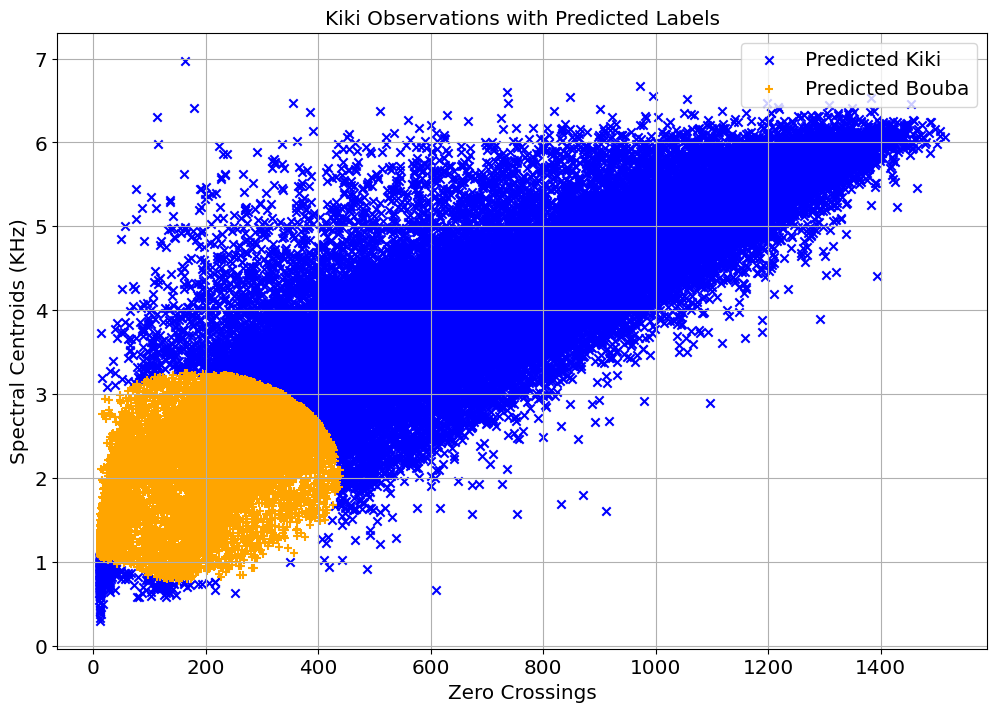

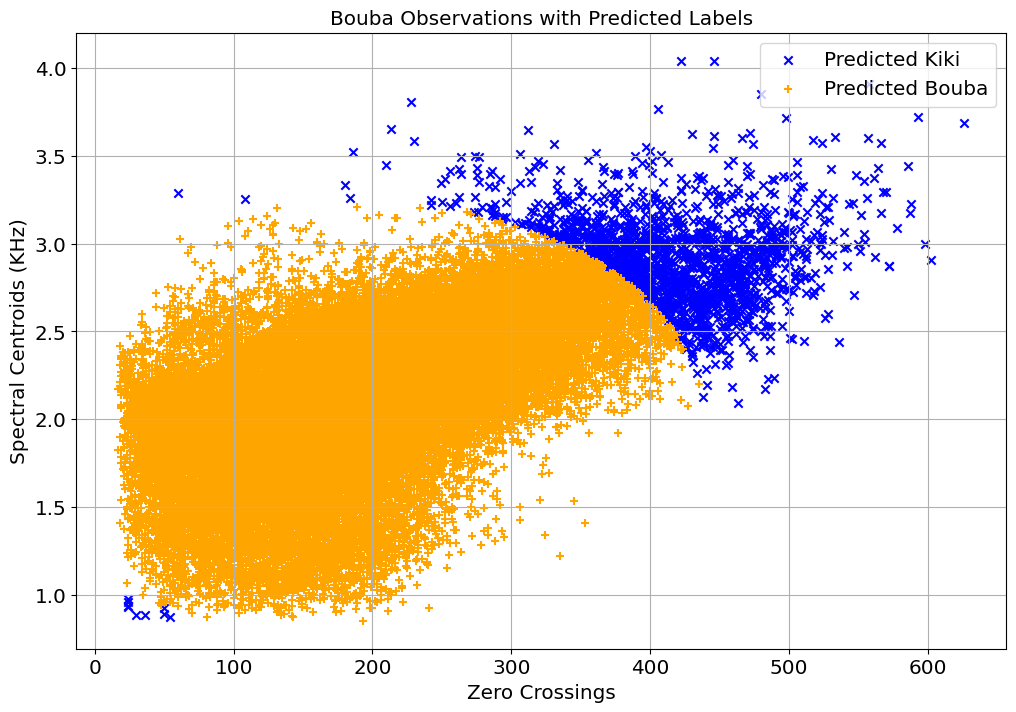

In [73]:
# add your code below
def classify_all_observations(zc_array, sc_array, mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s,
                              mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s,
                              prior_kiki, prior_bouba):
    predicted_labels = []
    for zc, sc in zip(zc_array, sc_array):
        label = classify_kiki_or_bouba(zc, sc,
                                       mean_kiki_z, var_kiki_z, mean_kiki_s, var_kiki_s,
                                       mean_bouba_z, var_bouba_z, mean_bouba_s, var_bouba_s,
                                       prior_kiki, prior_bouba)
        predicted_labels.append(label)
    return np.array(predicted_labels)

kiki_z_mean, kiki_z_var = mle_parameters(kiki_zc)
kiki_s_mean, kiki_s_var = mle_parameters(kiki_sc)
bouba_z_mean, bouba_z_var = mle_parameters(bouba_zc)
bouba_s_mean, bouba_s_var = mle_parameters(bouba_sc)
prior_kiki, prior_bouba = estimate_prior(len(kiki_zc), len(bouba_zc))
kiki_predicted_labels = classify_all_observations(kiki_zc, kiki_sc,
                                                  kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                                                  bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                                                  prior_kiki, prior_bouba)

bouba_predicted_labels = classify_all_observations(bouba_zc, bouba_sc,
                                                   kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                                                   bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                                                   prior_kiki, prior_bouba)

def plot_classification(zc_array, sc_array, predicted_labels, class_name):
    plt.figure()
    plt.scatter(zc_array[predicted_labels == 1], sc_array[predicted_labels == 1], color='blue', marker='x', label='Predicted Kiki')
    plt.scatter(zc_array[predicted_labels == 0], sc_array[predicted_labels == 0], color='orange', marker='+', label='Predicted Bouba')
    plt.title(f'{class_name} Observations with Predicted Labels')
    plt.xlabel('Zero Crossings')
    plt.ylabel('Spectral Centroids (KHz)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

plot_classification(kiki_zc, kiki_sc, kiki_predicted_labels, 'Kiki')
plot_classification(bouba_zc, bouba_sc, bouba_predicted_labels, 'Bouba')


# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

**Answer:**
By comparing the classification results and the original distribution map, we can see that the model as a whole can capture the distribution of the two categories well, but there is still room for improvement in the classification of the boundary overlapping areas.

# 2.8
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

In [74]:
# add your code below
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score

all_true_labels = np.concatenate([np.ones_like(kiki_predicted_labels), np.zeros_like(bouba_predicted_labels)])
all_predicted_labels = np.concatenate([kiki_predicted_labels, bouba_predicted_labels])

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

balanced_acc = balanced_accuracy_score(all_true_labels, all_predicted_labels)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

precision_kiki = precision_score(all_true_labels, all_predicted_labels, pos_label=1)
precision_bouba = precision_score(all_true_labels, all_predicted_labels, pos_label=0)
print(f"Precision (Kiki): {precision_kiki:.4f}")
print(f"Precision (Bouba): {precision_bouba:.4f}")

recall_kiki = recall_score(all_true_labels, all_predicted_labels, pos_label=1)
recall_bouba = recall_score(all_true_labels, all_predicted_labels, pos_label=0)
print(f"Recall (Kiki): {recall_kiki:.4f}")
print(f"Recall (Bouba): {recall_bouba:.4f}")




Confusion Matrix:
[[51777  1608]
 [11713 34297]]
Accuracy: 0.8660
Balanced Accuracy: 0.8577
Precision (Kiki): 0.9552
Precision (Bouba): 0.8155
Recall (Kiki): 0.7454
Recall (Bouba): 0.9699


# 2.9

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [75]:
# add your code below

test_bouba_path = '/content/musicinformatics/kikibouba_test/bouba'
test_kiki_path = '/content/musicinformatics/kikibouba_test/kiki'

test_bouba_zc = []
test_bouba_sc = []
test_bouba_files = []

for file in os.listdir(test_bouba_path):
    if file.endswith('.mp3'):
        test_bouba_files.append(file)

for file in test_bouba_files:
    data, sr = librosa.load(os.path.join(test_bouba_path, file), sr=sample_rate)
    zc = extractZC(data, window_size_in_samples, window_hop_in_samples)
    sc = extractSC(data, window_size_in_samples, window_hop_in_samples, sr)

    test_bouba_zc.append(zc)
    test_bouba_sc.append(sc)

test_bouba_zc_array = np.concatenate(test_bouba_zc)
test_bouba_sc_array = np.concatenate(test_bouba_sc) / 1000

test_kiki_zc = []
test_kiki_sc = []
test_kiki_files = []

for file in os.listdir(test_kiki_path):
    if file.endswith('.mp3'):
        test_kiki_files.append(file)

for file in test_kiki_files:
    data, sr = librosa.load(os.path.join(test_kiki_path, file), sr=sample_rate)
    zc = extractZC(data, window_size_in_samples, window_hop_in_samples)
    sc = extractSC(data, window_size_in_samples, window_hop_in_samples, sr)

    test_kiki_zc.append(zc)
    test_kiki_sc.append(sc)

test_kiki_zc_array = np.concatenate(test_kiki_zc)
test_kiki_sc_array = np.concatenate(test_kiki_sc) / 1000

test_kiki_predicted_labels = classify_all_observations(test_kiki_zc_array, test_kiki_sc_array,
                                                       kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                                                       bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                                                       prior_kiki, prior_bouba)

test_bouba_predicted_labels = classify_all_observations(test_bouba_zc_array, test_bouba_sc_array,
                                                        kiki_z_mean, kiki_z_var, kiki_s_mean, kiki_s_var,
                                                        bouba_z_mean, bouba_z_var, bouba_s_mean, bouba_s_var,
                                                        prior_kiki, prior_bouba)

test_true_labels = np.concatenate([np.ones_like(test_kiki_predicted_labels), np.zeros_like(test_bouba_predicted_labels)])
test_predicted_labels = np.concatenate([test_kiki_predicted_labels, test_bouba_predicted_labels])

from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score

test_conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
print("Confusion Matrix (Test Set):")
print(test_conf_matrix)

test_accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print(f"Accuracy (Test Set): {test_accuracy:.4f}")

test_balanced_acc = balanced_accuracy_score(test_true_labels, test_predicted_labels)
print(f"Balanced Accuracy (Test Set): {test_balanced_acc:.4f}")

test_precision_kiki = precision_score(test_true_labels, test_predicted_labels, pos_label=1)
test_precision_bouba = precision_score(test_true_labels, test_predicted_labels, pos_label=0)
print(f"Precision (Kiki) - Test Set: {test_precision_kiki:.4f}")
print(f"Precision (Bouba) - Test Set: {test_precision_bouba:.4f}")

test_recall_kiki = recall_score(test_true_labels, test_predicted_labels, pos_label=1)
test_recall_bouba = recall_score(test_true_labels, test_predicted_labels, pos_label=0)
print(f"Recall (Kiki) - Test Set: {test_recall_kiki:.4f}")
print(f"Recall (Bouba) - Test Set: {test_recall_bouba:.4f}")

print("\nComparison with Training Set Results:")
print(f"Accuracy (Train Set): {accuracy:.4f}")
print(f"Balanced Accuracy (Train Set): {balanced_acc:.4f}")
print(f"Precision (Kiki) - Train Set: {precision_kiki:.4f}")
print(f"Precision (Bouba) - Train Set: {precision_bouba:.4f}")
print(f"Recall (Kiki) - Train Set: {recall_kiki:.4f}")
print(f"Recall (Bouba) - Train Set: {recall_bouba:.4f}")




Confusion Matrix (Test Set):
[[52978  1822]
 [11941 33700]]
Accuracy (Test Set): 0.8630
Balanced Accuracy (Test Set): 0.8526
Precision (Kiki) - Test Set: 0.9487
Precision (Bouba) - Test Set: 0.8161
Recall (Kiki) - Test Set: 0.7384
Recall (Bouba) - Test Set: 0.9668

Comparison with Training Set Results:
Accuracy (Train Set): 0.8660
Balanced Accuracy (Train Set): 0.8577
Precision (Kiki) - Train Set: 0.9552
Precision (Bouba) - Train Set: 0.8155
Recall (Kiki) - Train Set: 0.7454
Recall (Bouba) - Train Set: 0.9699


# 2.10

Discuss some ways you might build a better Kiki-Bouba classifier.

**Answer:** The following methods can be used: add more meaningful audio features, try to use more complex classification algorithms, solve the problem of class imbalance through weighting or data enhancement, use cross-validation and hyperparameter tuning to optimize model performance, etc.